In [124]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.dpi'] = 300

In [37]:
df=sns.load_dataset('mpg')

In [38]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [39]:
mpg=df['mpg']

In [40]:
features=df[['displacement','horsepower','weight']]

In [41]:
mpg.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [42]:
features.head()

,displacement,horsepower,weight
0,307.0,130.0,3504
1,350.0,165.0,3693
2,318.0,150.0,3436
3,304.0,150.0,3433
4,302.0,140.0,3449


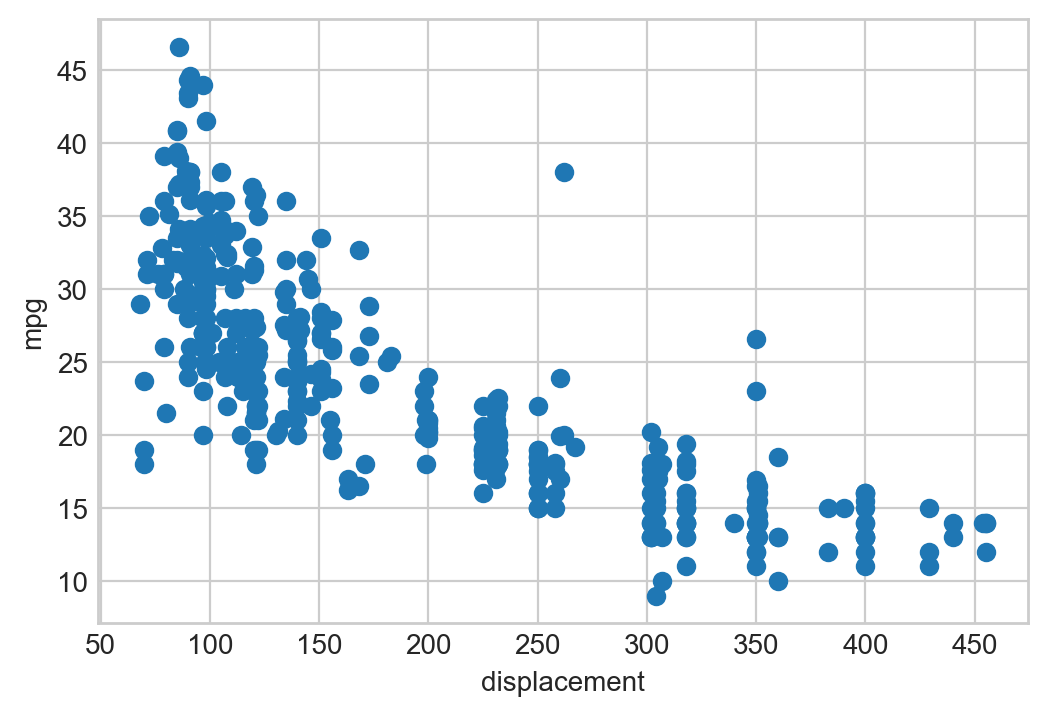

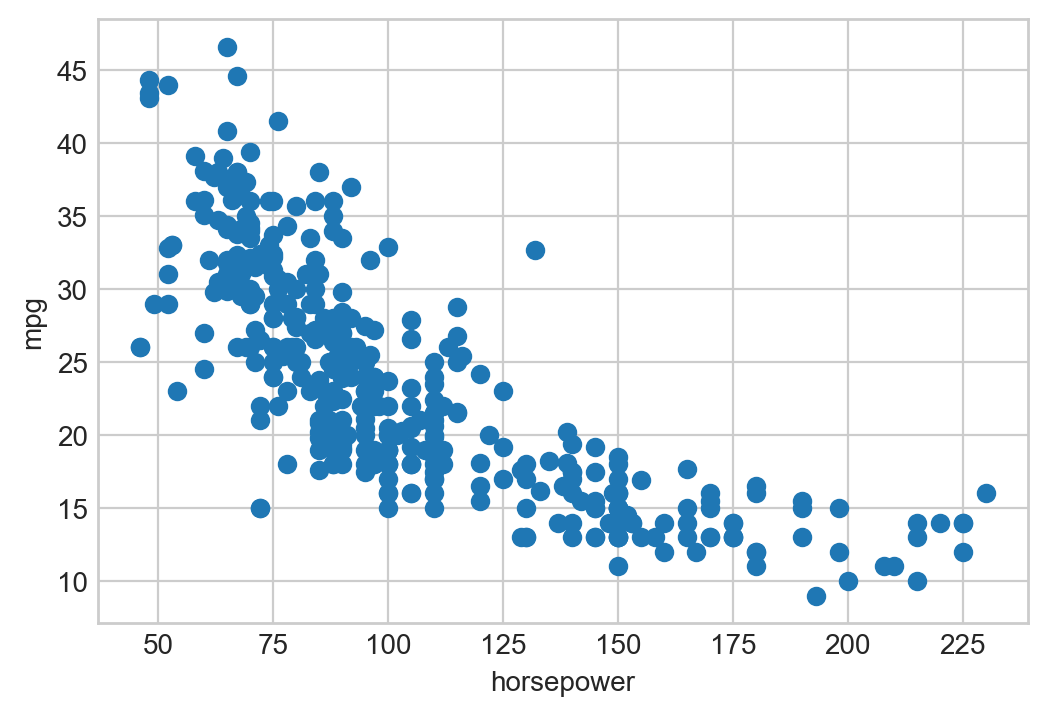

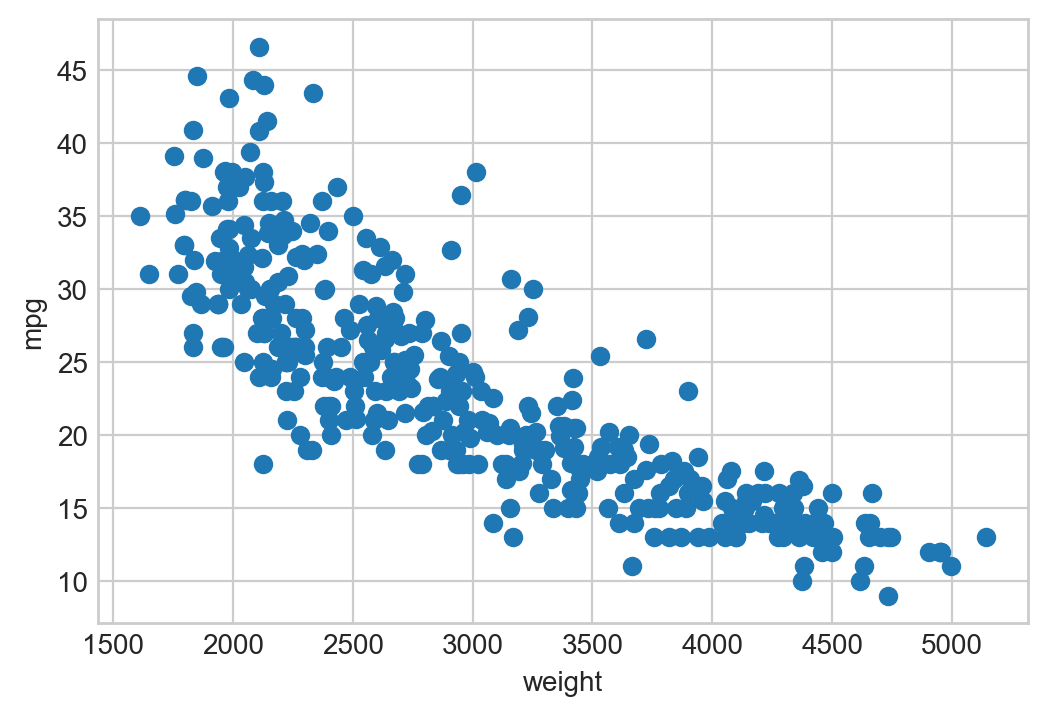

In [43]:
for col in features.columns:
    plt.figure(dpi=200)
    plt.scatter(features[col], mpg)
    plt.xlabel(col)
    plt.ylabel('mpg')
    plt.show()


In [44]:
features.horsepower.isna().sum()

6

In [45]:
features.horsepower.fillna(features.horsepower.median(),inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [46]:
features.horsepower.isna().sum()

0

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [92]:
X_train, X_test, y_train, y_test = train_test_split(features, mpg,
                    test_size=0.2, )

In [93]:
model=LinearRegression()

In [95]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [102]:
pred = model.predict(X_test)

In [100]:
acc = r2_score(y_test,pred)
print(f"Accuracy: {acc*100:.2f}")

Accuracy: 70.46


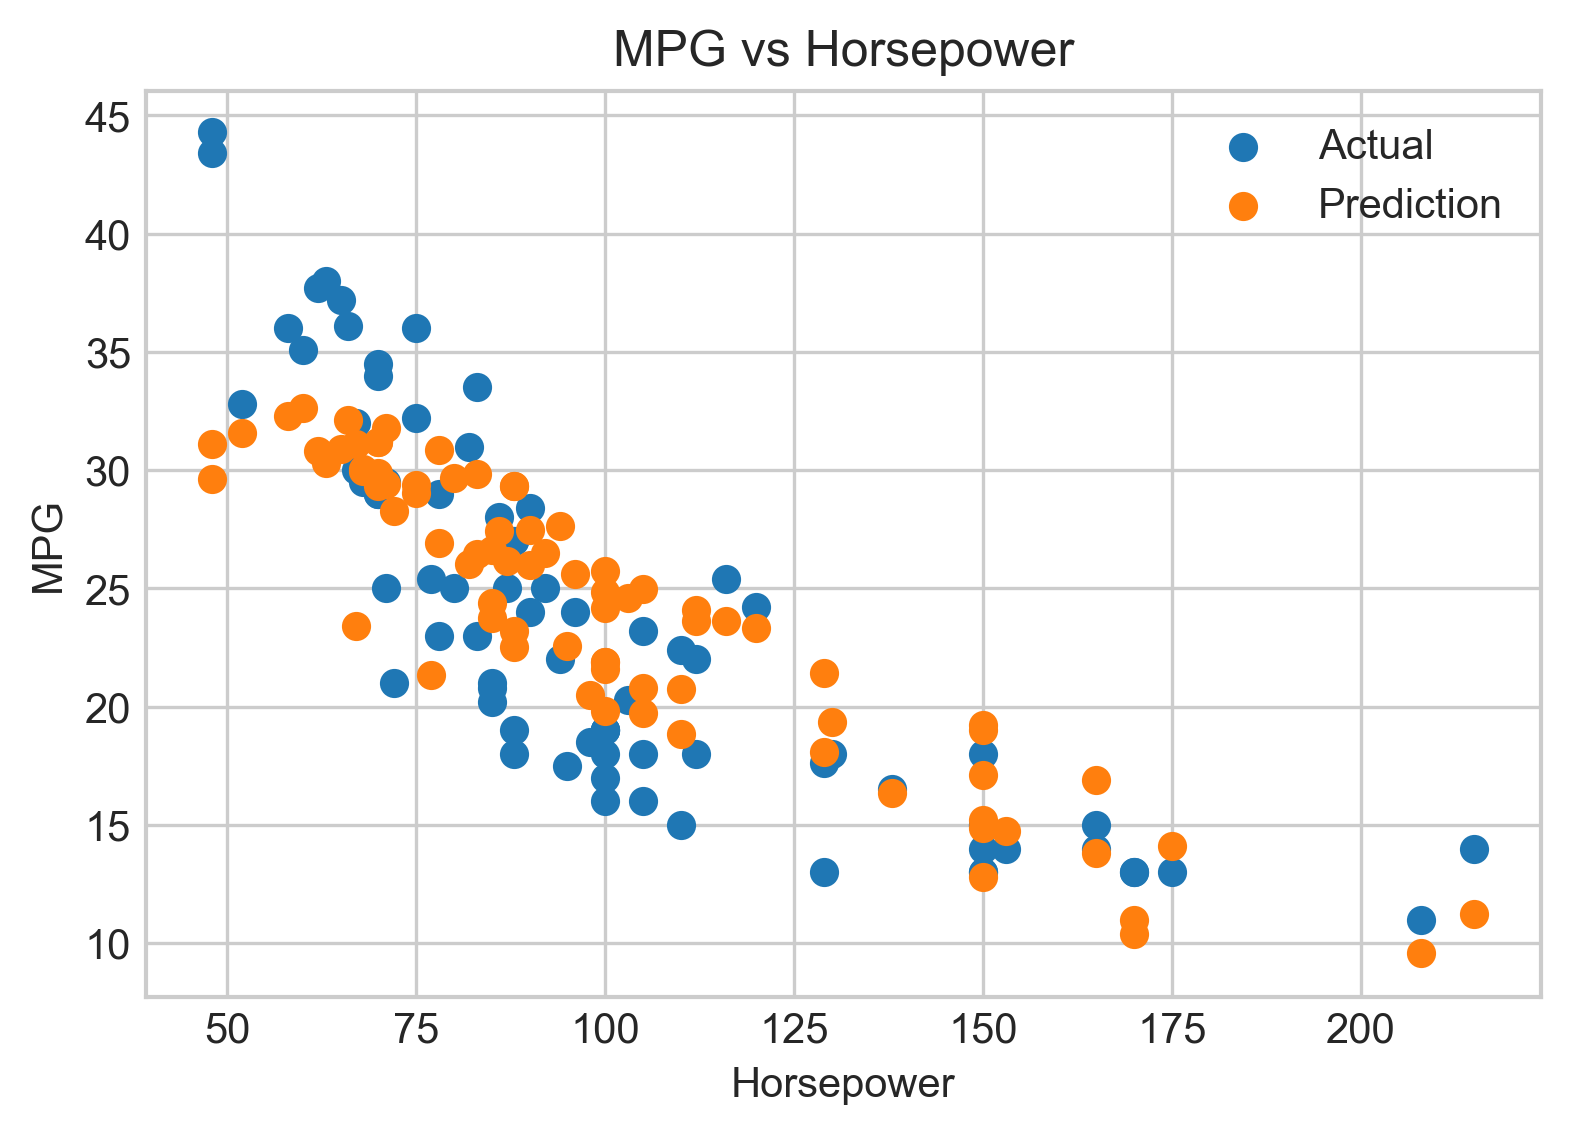

In [128]:
plt.scatter(X_test['horsepower'], y_test, label='Actual')
plt.scatter(X_test['horsepower'], pred, label='Prediction')
plt.ylabel('MPG')
plt.xlabel('Horsepower')
plt.legend()
plt.title("MPG vs Horsepower")
plt.show()

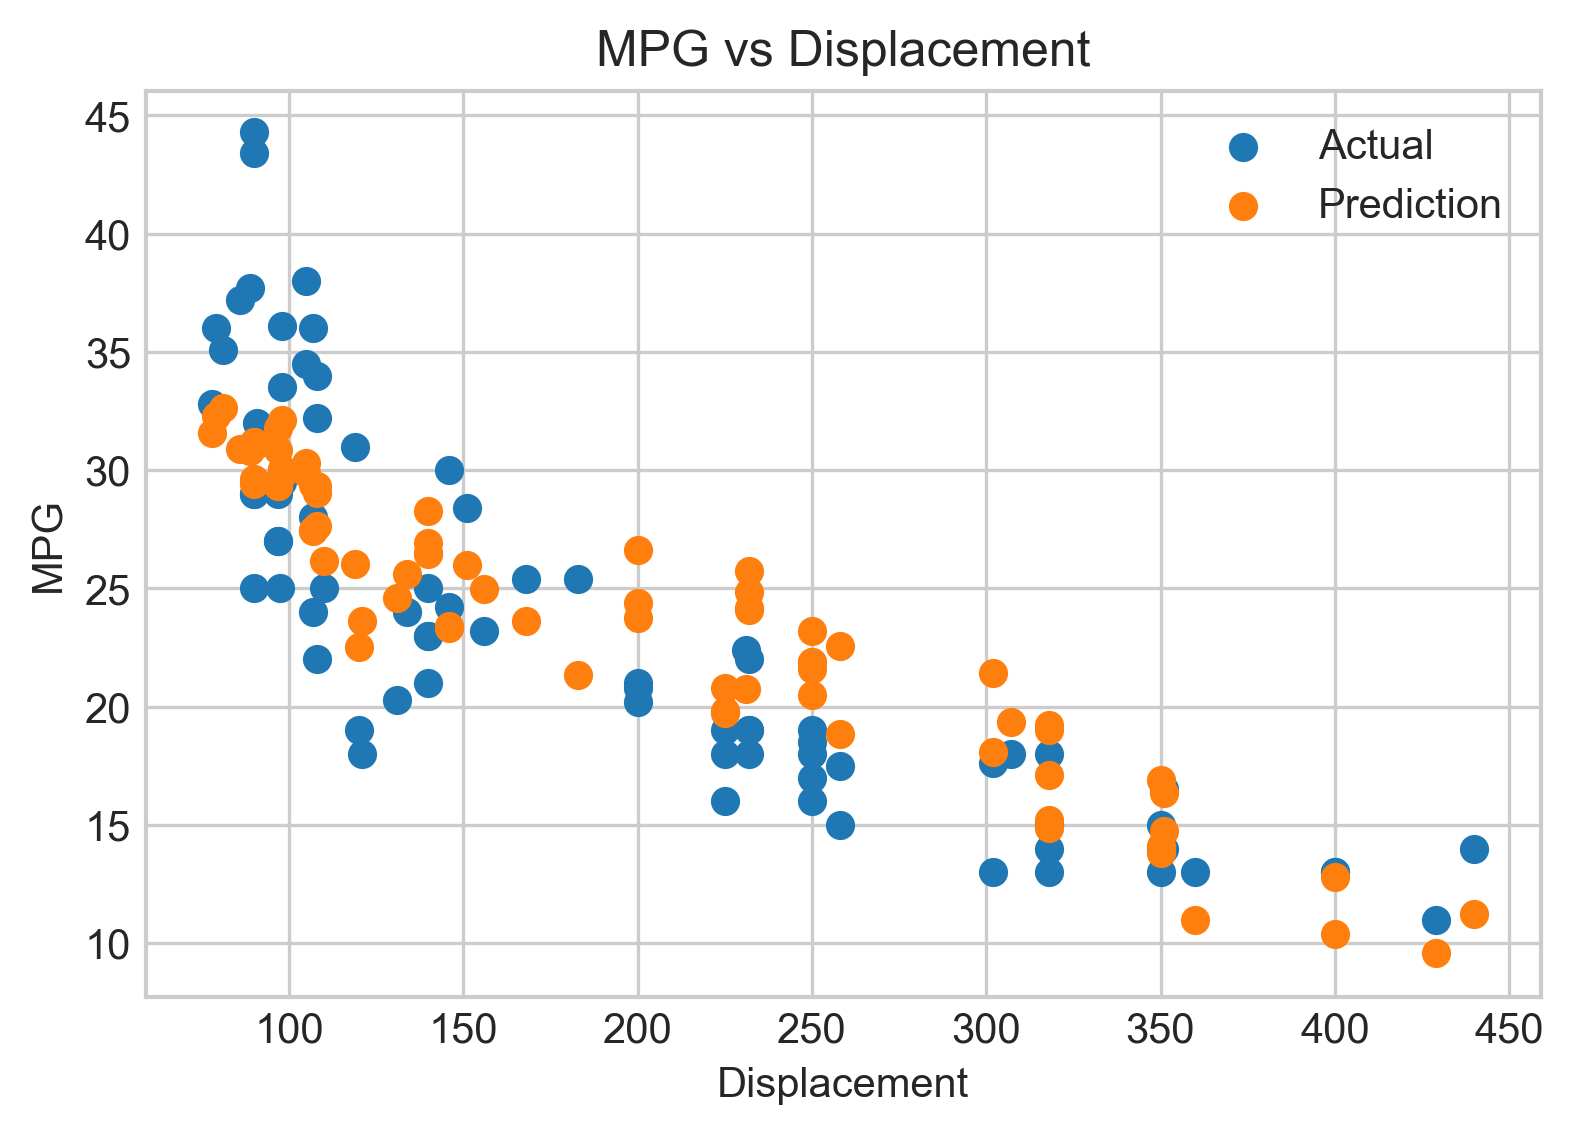

In [125]:
plt.scatter(X_test['displacement'], y_test, label='Actual')
plt.scatter(X_test['displacement'], pred, label='Prediction')
plt.ylabel('MPG')
plt.xlabel('Displacement')
plt.legend()
plt.title("MPG vs Displacement")
plt.show()

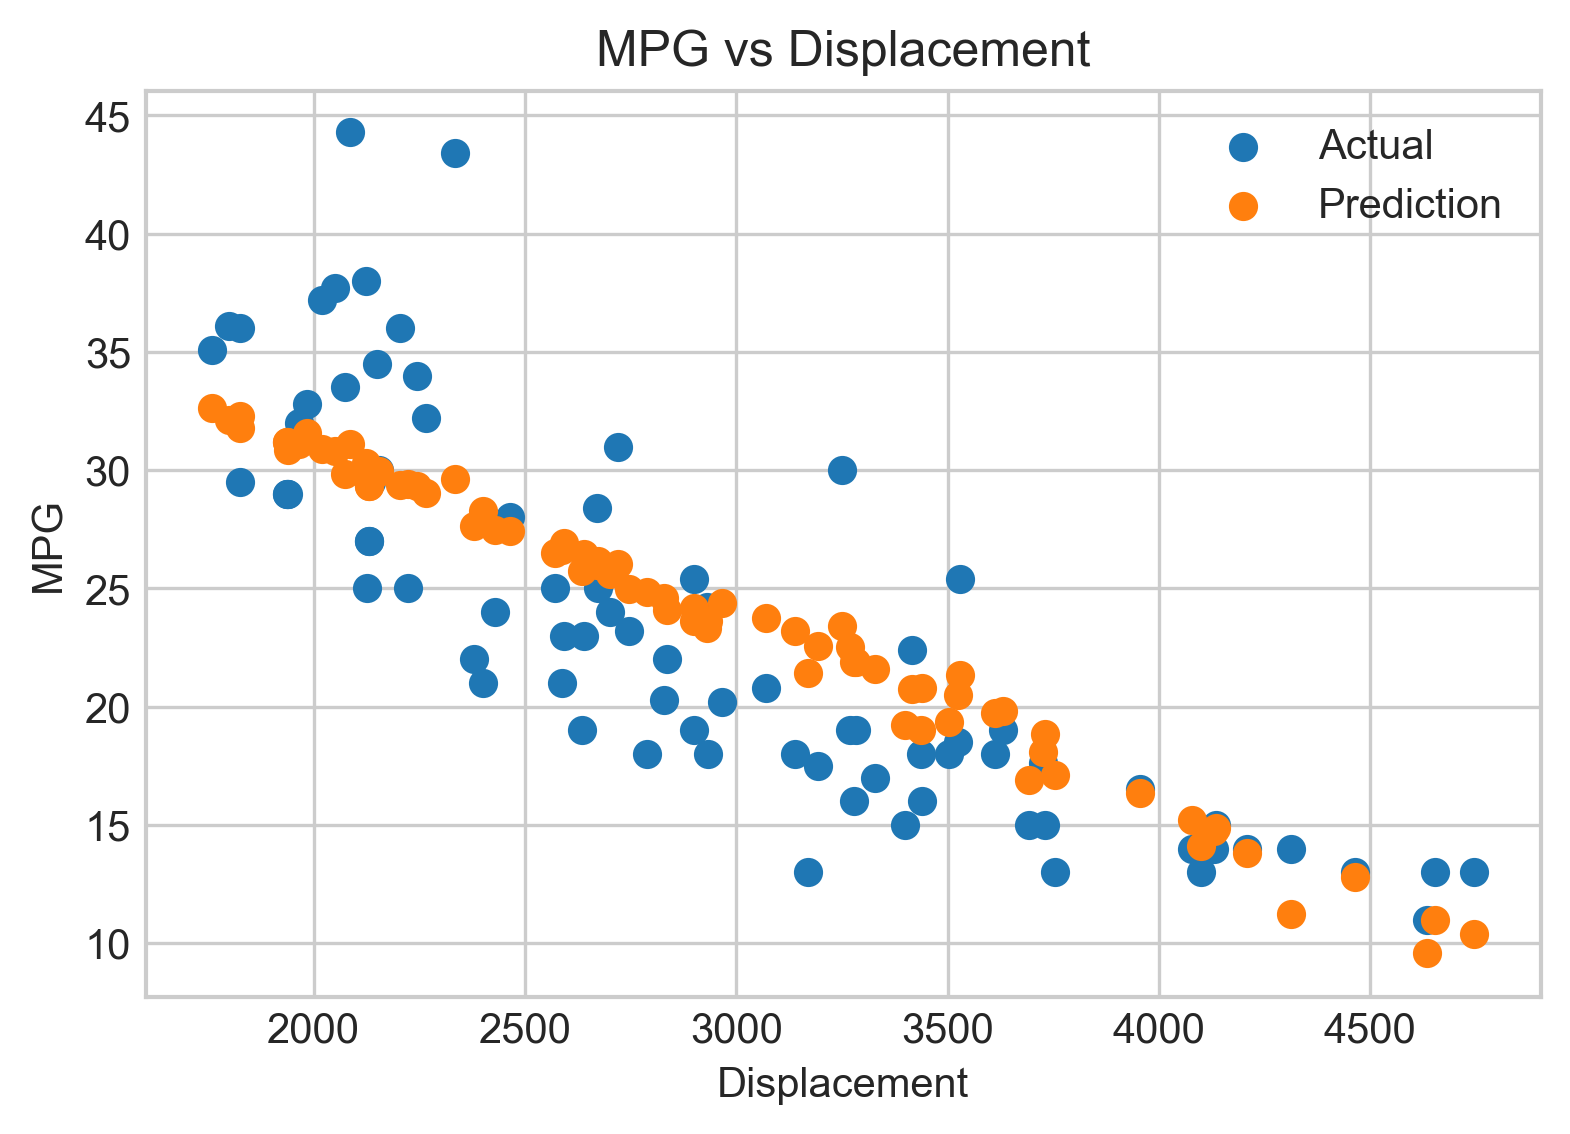

In [132]:
plt.scatter(X_test['weight'], y_test, label='Actual')
plt.scatter(X_test['weight'], pred, label='Prediction')
plt.ylabel('MPG')
plt.xlabel('Displacement')
plt.legend()
plt.title("MPG vs Displacement")
plt.show()